In [ ]:
# !pip install seaborn

In [ ]:
# %matplotlib notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymongo import MongoClient
# import seaborn as sns
import math

In [2]:
client = MongoClient('mongodb://localhost:27017')
collection = client.GFM.Data_12_27_2020
db = pd.DataFrame(collection.find({"Status":"Active","Category":"Medical"}))
# display(db.head())

In [3]:
dbData = db.drop(["_id",
#                   "Position",
                  "Status",
                  "CurrencyCode",
#                   "Duration",
                  "ErrorMessage","Organiser"], axis = 1)

972

In [6]:
#DataError : goal = 0 means Amount_Raised = 0
idx = (dbData.Goal == 0)
dbData.loc[idx] = dbData.loc[idx].rename(columns={'Amount_Raised':'Goal','Goal':'Amount_Raised'})
dbData["Progress"] = dbData.Amount_Raised/dbData.Goal

dbData.dropna(subset=['Goal'], inplace = True)
print(len(dbData))
dbData.head(3)

905


,Url,Category,Position,Amount_Raised,Description,Goal,Location,Text,Title,Duration,Progress
0,https://www.gofundme.com/f/28b1bckz6o,Medical,0,1205.0,We don’t need to explain a lot !\n\nWhat’s our...,10000.0,,We don’t need to explain a lot !What’s our par...,Fundraiser by Sarjit Singh : Just 1 euro is en...,7.0,0.120500
1,https://www.gofundme.com/f/money-to-buy-hearin...,Medical,1,0.0,"Hello there, I'm a random guy from India who's...",250.0,,"Hello there, I'm a random guy from India who's...",Fundraiser by Chandan Shivu Kumar : Money to b...,348.0,0.000000
2,https://www.gofundme.com/f/justiceforjacobblake,Medical,2,2301010.0,On August 23rd my son was shot multiple times ...,3000000.0,"Kenosha, WI",On August 23rd my son was shot multiple times ...,Fundraiser by Julia Jackson : Justice for Jaco...,NaN,0.767003


Poor Performers (Progress < 0.5):  107
Good Performers (0.5 < Progress < 2):  715
Excellent Performers (Progress > 2):  83


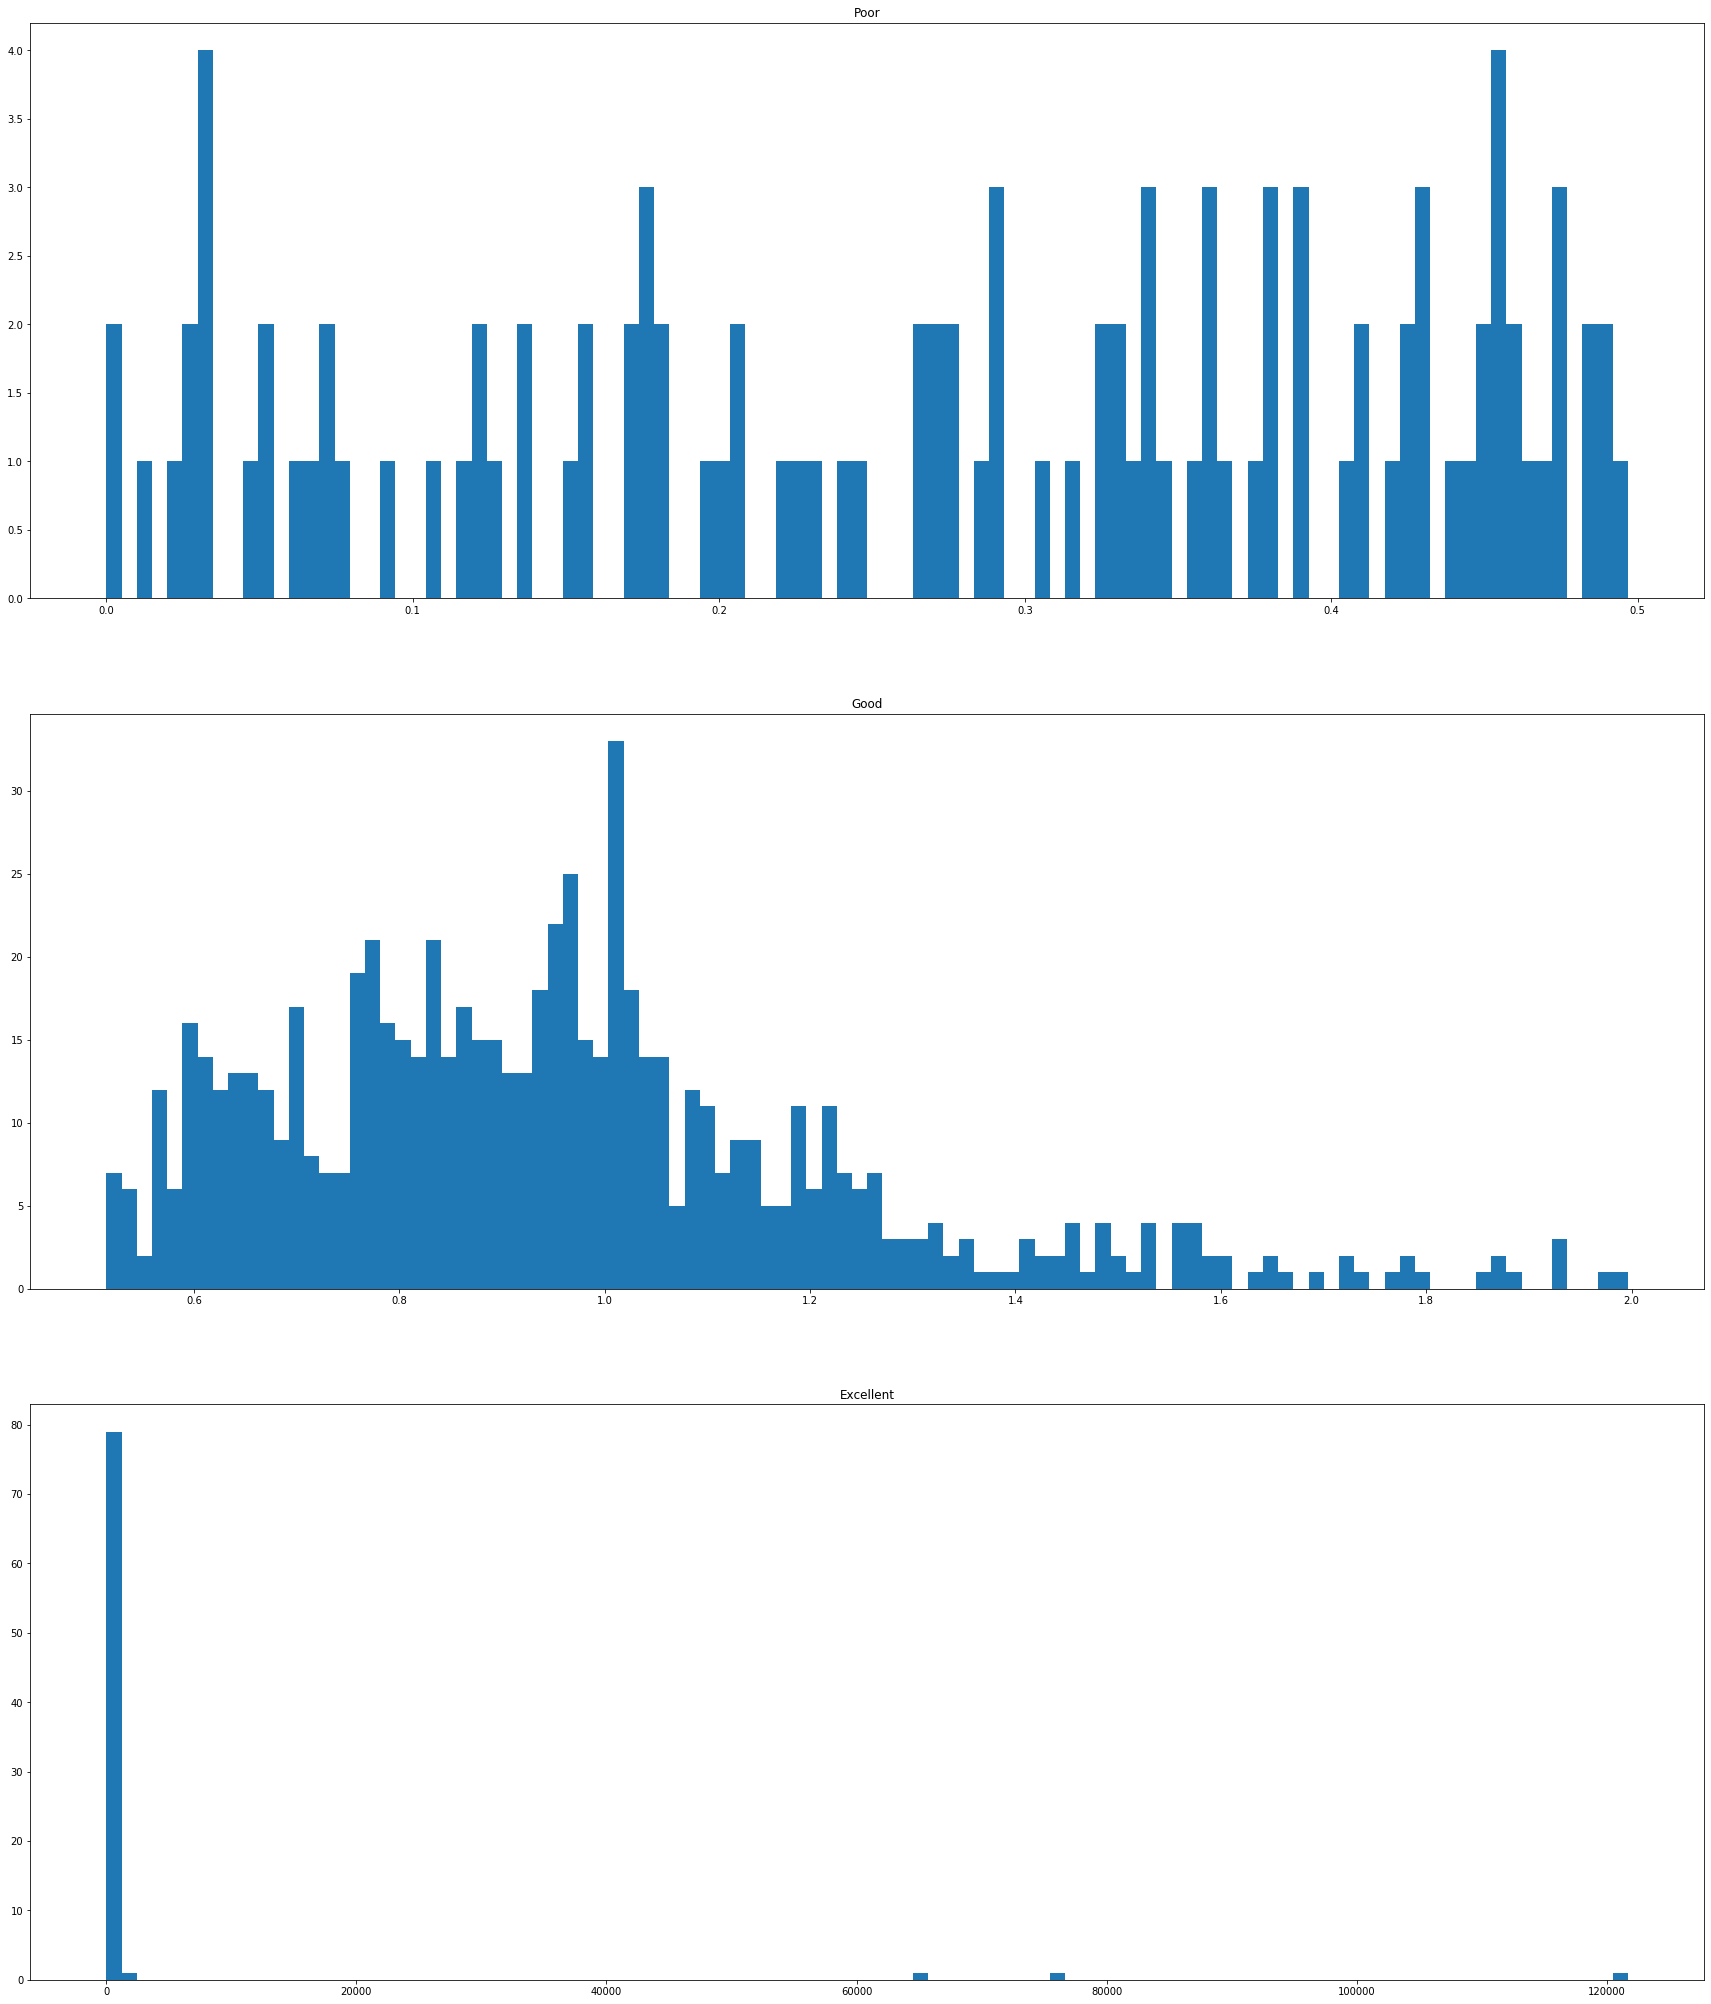

In [116]:
plt.figure(figsize = (30,36))

bound = 2
binCount = 100
lowerbound = 0.5

plt.subplot(3,1,1)
plt.title("Poor")
Campaign_Poor = dbData[dbData.Progress.apply(lambda x: (x < lowerbound))]
print("Poor Performers (Progress < {}): ".format(lowerbound),len(Campaign_Poor))
plt.hist(Campaign_Poor.Progress, bins = binCount);

plt.subplot(3,1,2)
plt.title("Good")
Campaign_Good = dbData[dbData.Progress.apply(lambda x: (x >= lowerbound and x<bound))]
print("Good Performers ({0} < Progress < {1}): ".format(lowerbound,bound),len(Campaign_Good))
plt.hist(Campaign_Good.Progress, bins = binCount);

plt.subplot(3,1,3)
plt.title("Excellent")
Campaign_Excellent = dbData[dbData.Progress.apply(lambda x: (x >= bound))]
print("Excellent Performers (Progress > {}): ".format(bound),len(Campaign_Excellent))
plt.hist(Campaign_Excellent.Progress, bins = binCount);

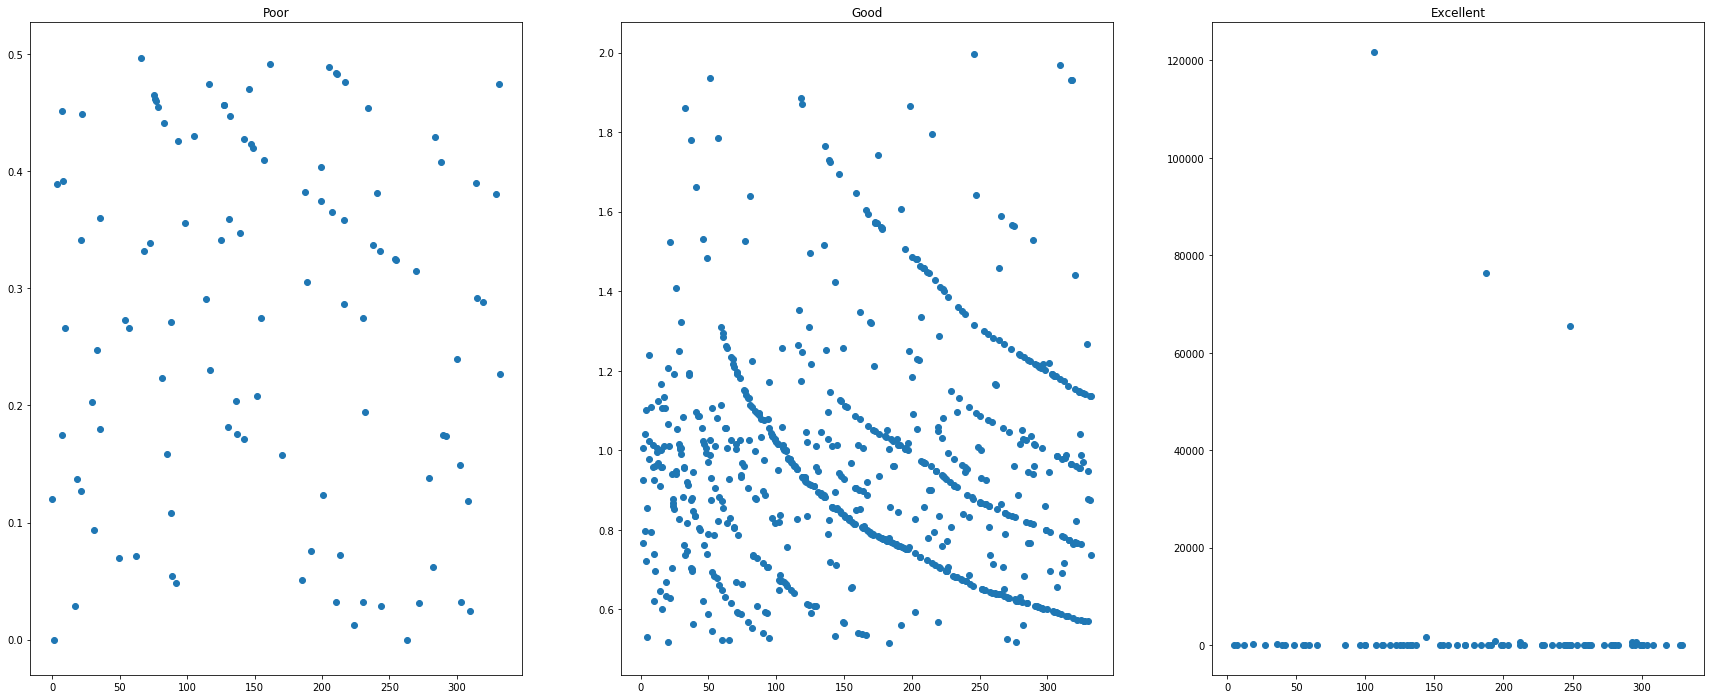

In [117]:
plt.figure(figsize = (30,12))

plt.subplot(1,3,1)
plt.title("Poor")
plt.scatter(Campaign_Poor.Position,Campaign_Poor.Progress)

plt.subplot(1,3,2)
plt.title("Good")
plt.scatter(Campaign_Good.Position,Campaign_Good.Progress)

plt.subplot(1,3,3)
plt.title("Excellent")
plt.scatter(Campaign_Excellent.Position,Campaign_Excellent.Progress)

Family of Exponentially decreasing Curves? 

In [119]:
Campaign_Good.Duration.value_counts()

5.0    2
4.0    2
6.0    2
2.0    1
3.0    1
Name: Duration, dtype: int64